# Visualize UMAP for plate 4 using different metadata

## Import libraries

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(arrow))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘arrow’ was built under R version 4.2.3”


## Set paths and variables

In [2]:
# Set directory and file structure
umap_dir <- file.path("results")
plate4_name <- "localhost231120090001"
umap_file <- "UMAP_localhost231120090001_sc_feature_selected.tsv.gz"
umap_path <- file.path(umap_dir, umap_file)


output_fig_dir <- file.path("figures")
umap_prefix <- "UMAP_"

# Define output figure path
output_umap_file <- file.path(
    output_fig_dir,
    paste0(umap_prefix, plate4_name)
)

print(output_umap_file)

[1] "figures/UMAP_localhost231120090001"


## Load in plate 4 UMAP data frame

In [3]:
# Load in the umap data
df <- readr::read_tsv(
    umap_path,
    col_types = readr::cols(
        .default = "c",
        "UMAP0" = "d",
        "UMAP1" = "d"
    )
)
cell_count_df <- df %>%
    dplyr::group_by(Metadata_Well) %>%
    dplyr::count() %>%
    dplyr::rename(Metadata_Cell_Count = n)

umap_cp_df <- df %>%
    dplyr::left_join(cell_count_df, by = "Metadata_Well")

head(umap_cp_df)

Metadata_WellRow,Metadata_WellCol,Metadata_heart_number,Metadata_cell_type,Metadata_heart_failure_type,Metadata_treatment,Metadata_Nuclei_Location_Center_X,Metadata_Nuclei_Location_Center_Y,Metadata_Cells_Location_Center_X,Metadata_Cells_Location_Center_Y,⋯,Metadata_Plate,Metadata_Well,Metadata_Cells_Number_Object_Number,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_Nuclei,Metadata_Nuclei_Number_Object_Number,Metadata_Site,UMAP0,UMAP1,Metadata_Cell_Count
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
B,2,2,Healthy,NA,NA,199.39506172839506,268.7925925925926,193.91474253695296,269.6415805236209,⋯,localhost231120090001,B02,4.0,4.0,7.0,7.0,f00,-0.7392384,6.578921,284
B,2,2,Healthy,NA,NA,303.5406746031746,350.73214285714283,314.8429554108832,368.93993366908245,⋯,localhost231120090001,B02,6.0,6.0,9.0,9.0,f00,-1.2073323,10.018383,284
B,2,2,Healthy,NA,NA,700.3885057471265,371.8,708.1122772201657,380.7111781093768,⋯,localhost231120090001,B02,7.0,7.0,10.0,10.0,f00,-2.8181896,6.796969,284
B,2,2,Healthy,NA,NA,855.8693181818181,481.07575757575756,877.1610089781958,515.307396323215,⋯,localhost231120090001,B02,8.0,8.0,12.0,12.0,f00,0.7092135,5.537147,284
B,2,2,Healthy,NA,NA,586.624513618677,509.8920233463035,590.4539671911617,504.11358745038024,⋯,localhost231120090001,B02,9.0,9.0,13.0,13.0,f00,-1.4251451,6.370945,284
B,2,2,Healthy,NA,NA,750.171052631579,564.1550751879699,747.9386888031897,583.0943198901889,⋯,localhost231120090001,B02,10.0,10.0,14.0,14.0,f00,-1.5679232,8.299535,284


## UMAP comparing heart number stratified by cell type and treatment

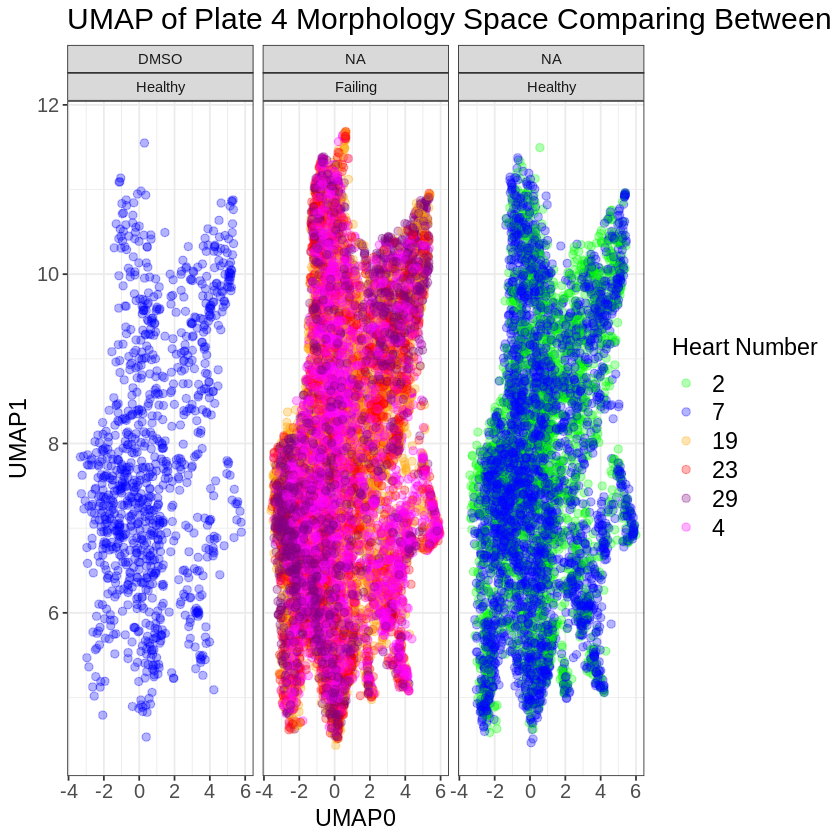

In [4]:
# Create UMAP labelled with the anomaly score as gradient
umap_heart_num_figure <- 
  ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1, color = Metadata_heart_number)) +
  geom_point(size = 2, alpha = 0.3) +
  scale_color_manual(name = "Heart Number",   
        values = c(
          "2" = "#00FF00",     
          "7" = "#0000FF",     
          "19" = "#FFA500",   
          "23" = "#FF0000",    
          "29" = "#800080",    
          "4" = "#FF00FF"      
        ),
        breaks = c("2", "7", "19", "23", "29", "4"),  
        labels = c("2", "7", "19", "23", "29", "4")
  ) +
  labs(title = "UMAP of Plate 4 Morphology Space Comparing Between Heart Numbers", x = "UMAP0", y = "UMAP1") +
  theme_bw() +
  theme(
    # Increase title size
    plot.title = element_text(size = 18),
    
    # Increase axis text size
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    
    # Increase legend size
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 14),
    
    # # Increase point size
    # plot.margin = margin(1,1,1,1, "cm")
  ) +
  facet_wrap(Metadata_treatment ~ Metadata_cell_type)

# saving image
output_file <- file.path(paste0(output_umap_file, "_heart_number.png"))
ggsave(output_file, umap_heart_num_figure, dpi = 500, height = 10, width = 14)

print(umap_heart_num_figure)

## UMAP of cell count per well

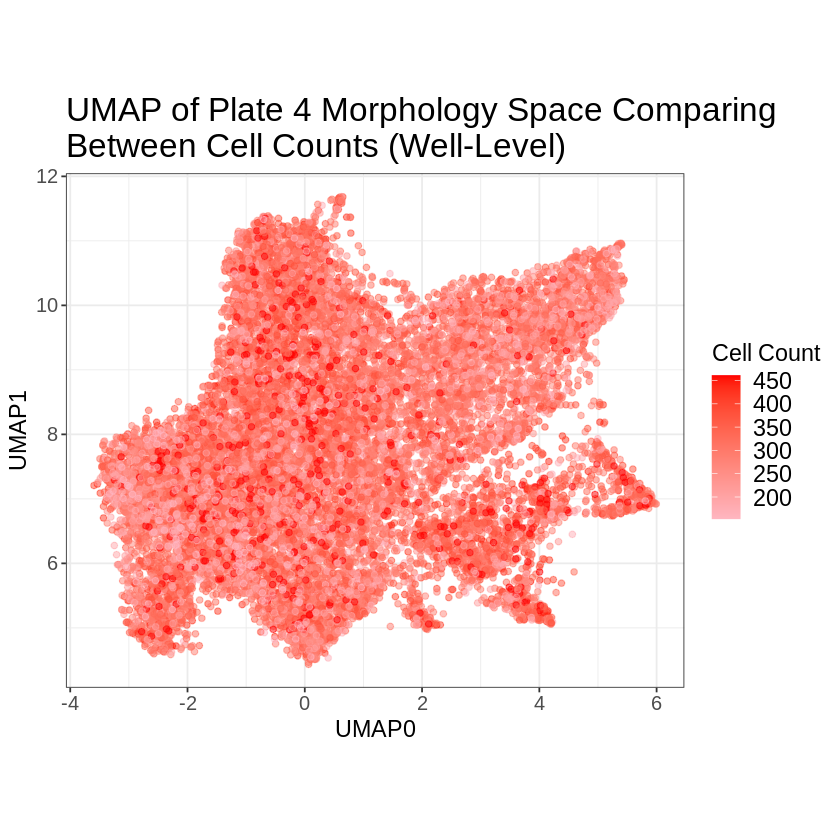

In [5]:
umap_cell_count_figure <- 
  ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_Cell_Count), alpha = 0.5) +
  theme_bw() +
  scale_color_continuous(
    name = "Cell Count", 
    low = "light pink",
    high = "red"
  ) +
  labs(title = "UMAP of Plate 4 Morphology Space Comparing\nBetween Cell Counts (Well-Level)", x = "UMAP0", y = "UMAP1") +
  theme(
    # Increase title size
    plot.title = element_text(size = 20),
    
    # Increase axis text size
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    
    # Increase legend size
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 14),
  ) +
  coord_fixed(1.1)

# saving image
output_file <- file.path(paste0(output_umap_file, "_well_cell_count.png"))
ggsave(output_file, umap_cell_count_figure, dpi = 500, height = 10, width = 12)


print(umap_cell_count_figure)

## UMAP of treatment

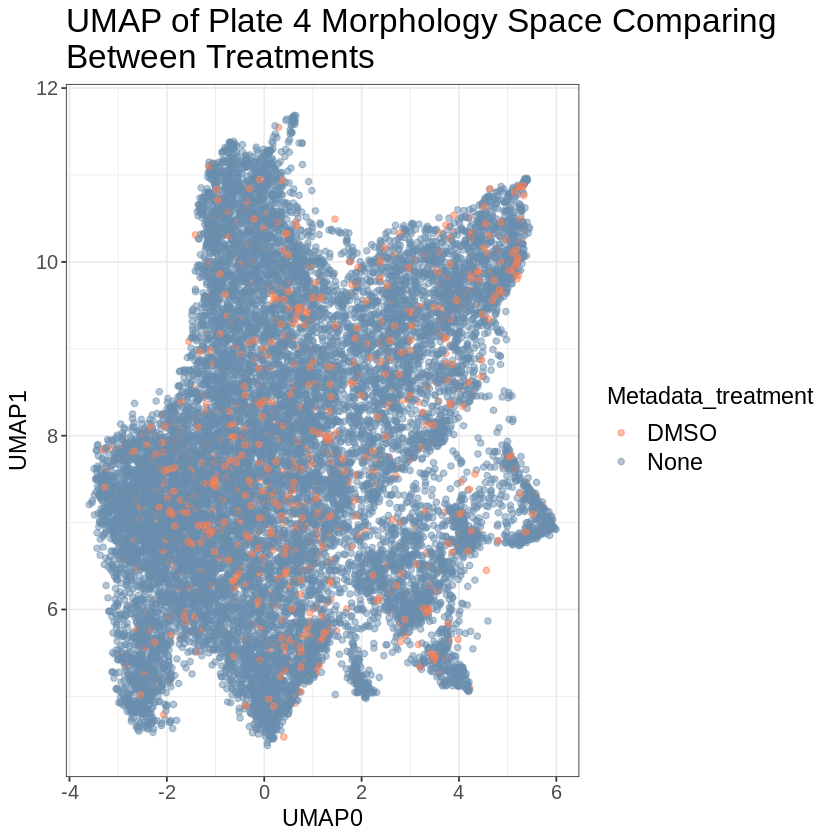

In [6]:
# Set NA values as "None"
umap_cp_df$Metadata_treatment <- ifelse(is.na(umap_cp_df$Metadata_treatment), "None", umap_cp_df$Metadata_treatment)

umap_treatment_figure <- 
  ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), alpha = 0.5) +
  scale_color_manual(values = c("DMSO" = "#FF7F50", "None" = "#6B8EAD")) +
  theme_bw() +
  labs(title = "UMAP of Plate 4 Morphology Space Comparing\nBetween Treatments", x = "UMAP0", y = "UMAP1") +
  theme(
    # Increase title size
    plot.title = element_text(size = 20),
    
    # Increase axis text size
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    
    # Increase legend size
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 14),
  )

# saving image
output_file <- file.path(paste0(output_umap_file, "_treatment.png"))
ggsave(output_file, umap_treatment_figure, dpi = 500, height = 10, width = 10)


print(umap_treatment_figure)

## UMAP of cell type

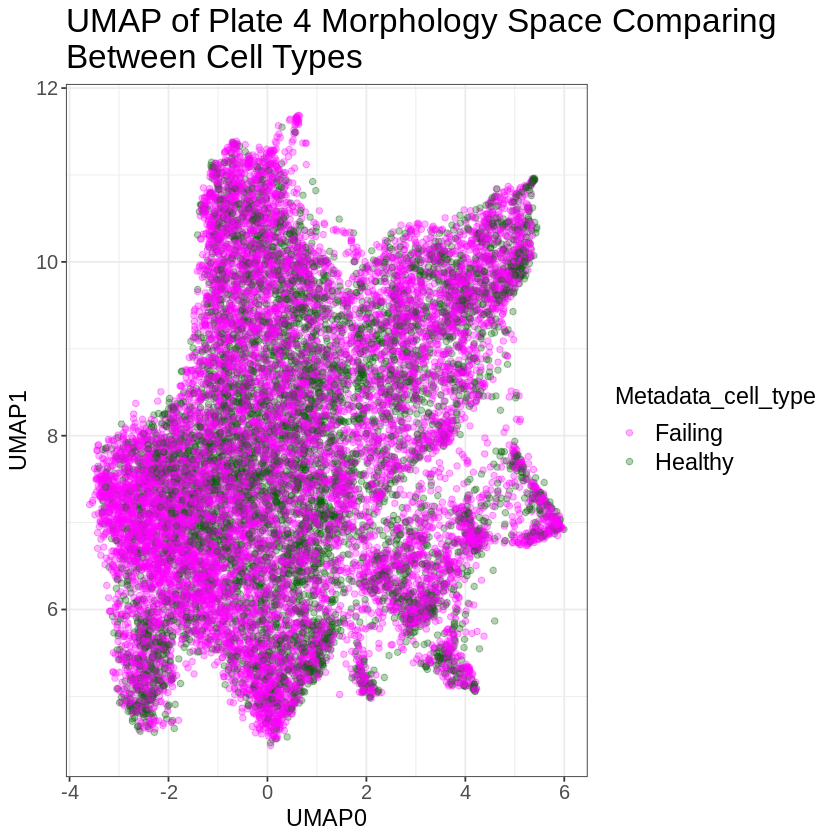

In [7]:
umap_cell_type_figure <- 
  ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_cell_type), alpha = 0.3) +
  scale_color_manual(values = c("Failing" = "magenta", "Healthy" = "darkgreen")) +
  theme_bw() +
  labs(title = "UMAP of Plate 4 Morphology Space Comparing\nBetween Cell Types", x = "UMAP0", y = "UMAP1") +
  theme(
    # Increase title size
    plot.title = element_text(size = 20),
    
    # Increase axis text size
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    
    # Increase legend size
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 14),
  )

# saving image
output_file <- file.path(paste0(output_umap_file, "_cell_types.png"))
ggsave(output_file, umap_cell_type_figure, dpi = 500, height = 10, width = 10)


print(umap_cell_type_figure)

## UMAP of number of neighbors based on cell segmentation

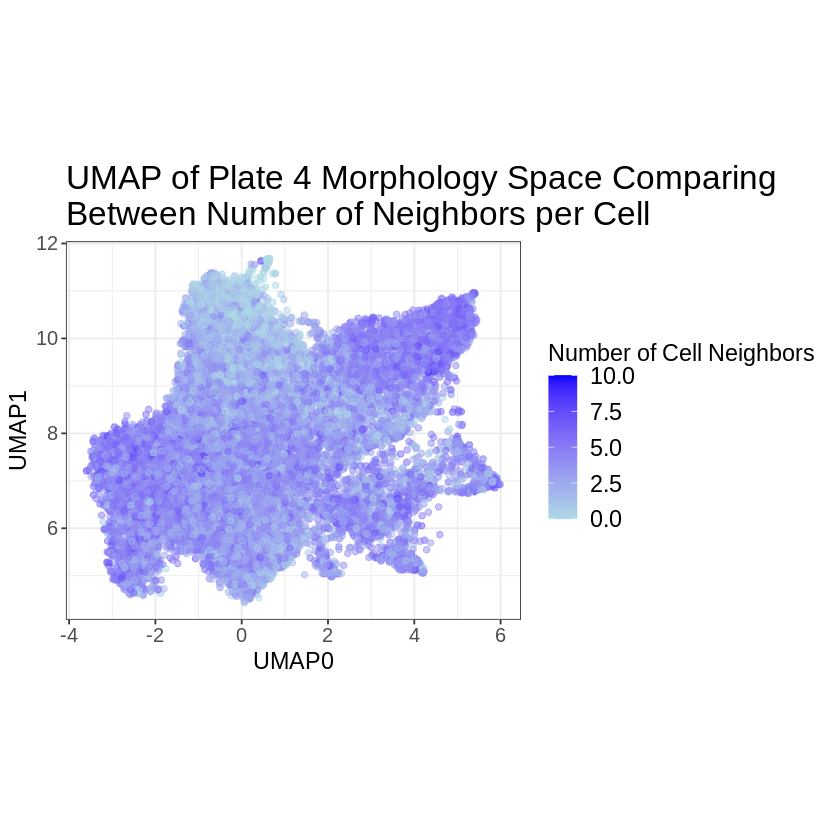

In [8]:
# Remove decimal from nuclei object number to avoid issues with merging
umap_cp_df <- umap_cp_df %>%
  mutate(Metadata_Nuclei_Number_Object_Number = gsub("\\.0", "", as.character(Metadata_Nuclei_Number_Object_Number)))

# Load in parquet file with nearest neighbors per single cell (not normalized)
neighbors_df <- arrow::read_parquet(
    "../../../3.process_cfret_features/data/single_cell_profiles/localhost231120090001_sc_annotated.parquet"
)

desired_columns <- c("Cells_Neighbors_NumberOfNeighbors_Adjacent", 
                     "Metadata_Well", 
                     "Metadata_Site", 
                     "Metadata_Nuclei_Number_Object_Number")

neighbors_df <- neighbors_df[, desired_columns]

neighbors_df <- neighbors_df %>%
  mutate(Metadata_Nuclei_Number_Object_Number = as.character(Metadata_Nuclei_Number_Object_Number))

# Assuming you want to merge based on the specified columns
merge_columns <- c("Metadata_Well", "Metadata_Site", "Metadata_Nuclei_Number_Object_Number")

# Merge number of neighbors based on cell to umap dataframe
merged_data <- merge(neighbors_df, umap_cp_df, by = merge_columns)

umap_cell_neighbors_figure <- 
  ggplot(merged_data, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Cells_Neighbors_NumberOfNeighbors_Adjacent), alpha = 0.5) +
  theme_bw() +
  scale_color_continuous(
    name = "Number of Cell Neighbors", 
    low = "light blue",
    high = "blue"
  ) +
  labs(title = "UMAP of Plate 4 Morphology Space Comparing\nBetween Number of Neighbors per Cell", x = "UMAP0", y = "UMAP1") +
  theme(
    # Increase title size
    plot.title = element_text(size = 20),
    
    # Increase axis text size
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    
    # Increase legend size
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 14),
  ) +
  coord_fixed(1.1)

# saving image
output_file <- file.path(paste0(output_umap_file, "_number_neighbors_cells.png"))
ggsave(output_file, umap_cell_neighbors_figure, dpi = 500, height = 10, width = 12)


print(umap_cell_neighbors_figure)


## Look at filtered plate 4 embeddings (only cells with 1 or less neighbors adjacent)

In [9]:
# Set directory and file structure
umap_dir <- file.path("results")
umap_file <- "UMAP_localhost231120090001_fs_filtered.tsv.gz"
umap_path <- file.path(umap_dir, umap_file)

# Load in the umap data
filtered_df <- readr::read_tsv(
    umap_path,
    col_types = readr::cols(
        .default = "c",
        "UMAP0" = "d",
        "UMAP1" = "d"
    )
)
cell_count_df <- filtered_df %>%
    dplyr::group_by(Metadata_Well) %>%
    dplyr::count() %>%
    dplyr::rename(Metadata_Cell_Count = n)

umap_filtered_df <- filtered_df %>%
    dplyr::left_join(cell_count_df, by = "Metadata_Well") %>%
    mutate_all(~ifelse(is.na(.), "None", .))

head(umap_filtered_df)


Metadata_WellRow,Metadata_WellCol,Metadata_heart_number,Metadata_cell_type,Metadata_heart_failure_type,Metadata_treatment,Metadata_Nuclei_Location_Center_X,Metadata_Nuclei_Location_Center_Y,Metadata_Cells_Location_Center_X,Metadata_Cells_Location_Center_Y,⋯,Metadata_Well,Metadata_Cells_Number_Object_Number,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_Nuclei,Metadata_Nuclei_Number_Object_Number,Metadata_Site,Metadata_Neighbors_Adjacent,UMAP0,UMAP1,Metadata_Cell_Count
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
B,2,2,Healthy,None,None,682.5027563395811,691.8302094818082,663.4094414582846,692.6148632858144,⋯,B02,16.0,16.0,21.0,21.0,f00,1.0,11.203852,10.441776,36
B,2,2,Healthy,None,None,948.2150537634409,804.736559139785,953.2931618144888,787.2183480027082,⋯,B02,17.0,17.0,23.0,23.0,f00,0.0,6.679914,11.812274,36
B,2,2,Healthy,None,None,510.5854189336235,138.96735582154517,505.5031326614002,151.43421411059657,⋯,B02,2.0,2.0,5.0,5.0,f01,0.0,9.580936,7.883685,36
B,2,2,Healthy,None,None,398.52264492753625,282.8949275362319,403.5600994749931,318.078935249148,⋯,B02,5.0,5.0,9.0,9.0,f01,1.0,10.303552,9.501124,36
B,2,2,Healthy,None,None,675.4748653500898,626.6938958707361,622.8742581767882,665.9914773994914,⋯,B02,13.0,13.0,18.0,18.0,f01,1.0,8.404872,8.932968,36
B,2,2,Healthy,None,None,254.06552006552008,160.76085176085175,198.26826264716024,245.51775774592386,⋯,B02,8.0,8.0,14.0,14.0,f02,1.0,9.326166,12.618956,36


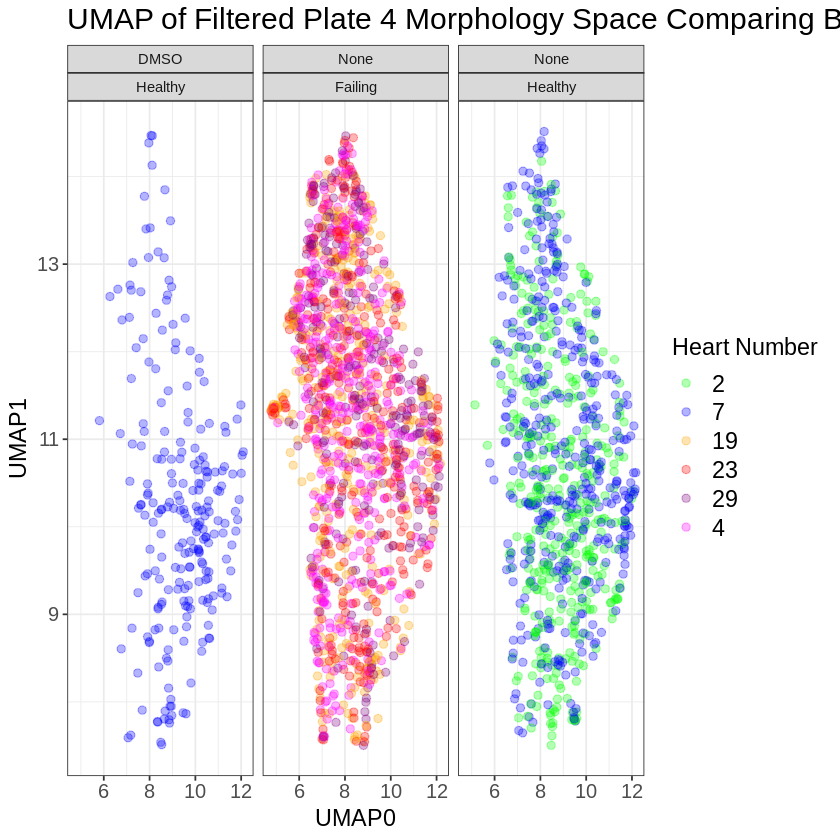

In [10]:
# Create UMAP labelled with the anomaly score as gradient
umap_filtered_heart_num_figure <- 
  ggplot(umap_filtered_df, aes(x = UMAP0, y = UMAP1, color = Metadata_heart_number)) +
  geom_point(size = 2, alpha = 0.3) +
  scale_color_manual(name = "Heart Number",   
        values = c(
          "2" = "#00FF00",     
          "7" = "#0000FF",     
          "19" = "#FFA500",   
          "23" = "#FF0000",    
          "29" = "#800080",    
          "4" = "#FF00FF"      
        ),
        breaks = c("2", "7", "19", "23", "29", "4"),  
        labels = c("2", "7", "19", "23", "29", "4")
  ) +
  labs(title = "UMAP of Filtered Plate 4 Morphology Space Comparing Between Heart Numbers of Isolated Cells", x = "UMAP0", y = "UMAP1") +
  theme_bw() +
  theme(
    # Increase title size
    plot.title = element_text(size = 18),
    
    # Increase axis text size
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    
    # Increase legend size
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 14),
    
  ) +
  facet_wrap(Metadata_treatment ~ Metadata_cell_type)

# saving image
output_file <- file.path(paste0(output_umap_file, "_filtered_heart_number.png"))
ggsave(output_file, umap_filtered_heart_num_figure, dpi = 500, height = 10, width = 14)

print(umap_filtered_heart_num_figure)

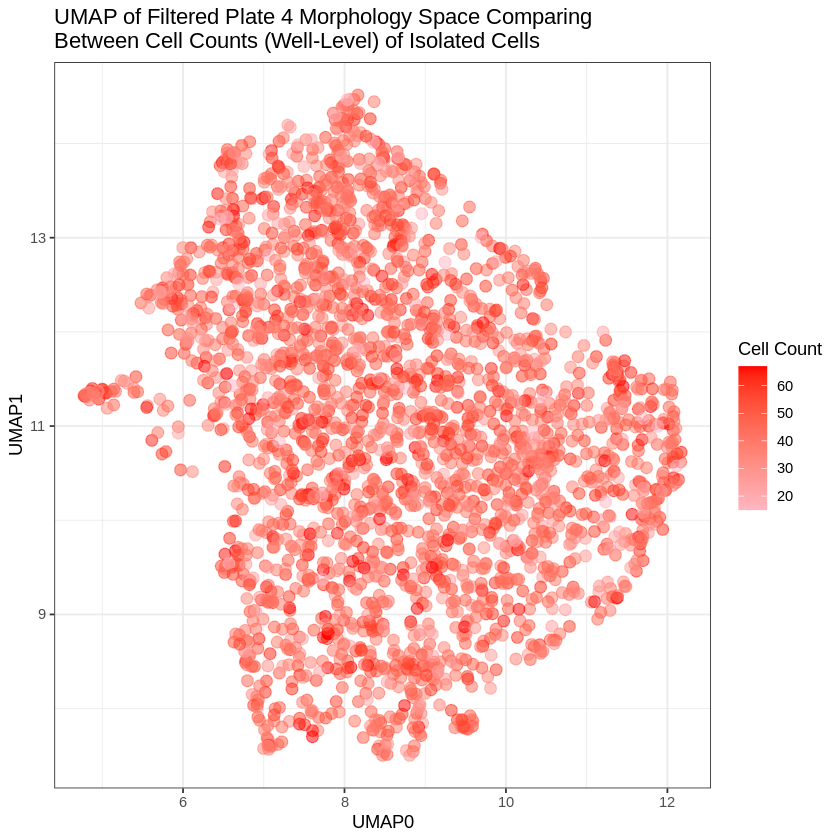

In [11]:
umap_filtered_cell_count_figure <- 
  ggplot(umap_filtered_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_Cell_Count), alpha = 0.5, size = 3) +
  theme_bw() +
  scale_color_continuous(
    name = "Cell Count", 
    low = "light pink",
    high = "red"
  ) +
  labs(title = "UMAP of Filtered Plate 4 Morphology Space Comparing\nBetween Cell Counts (Well-Level) of Isolated Cells", x = "UMAP0", y = "UMAP1")

# saving image
output_file <- file.path(paste0(output_umap_file, "_filtered_well_cell_count.png"))
ggsave(output_file, umap_filtered_cell_count_figure, dpi = 500, height = 8, width = 8)


print(umap_filtered_cell_count_figure)

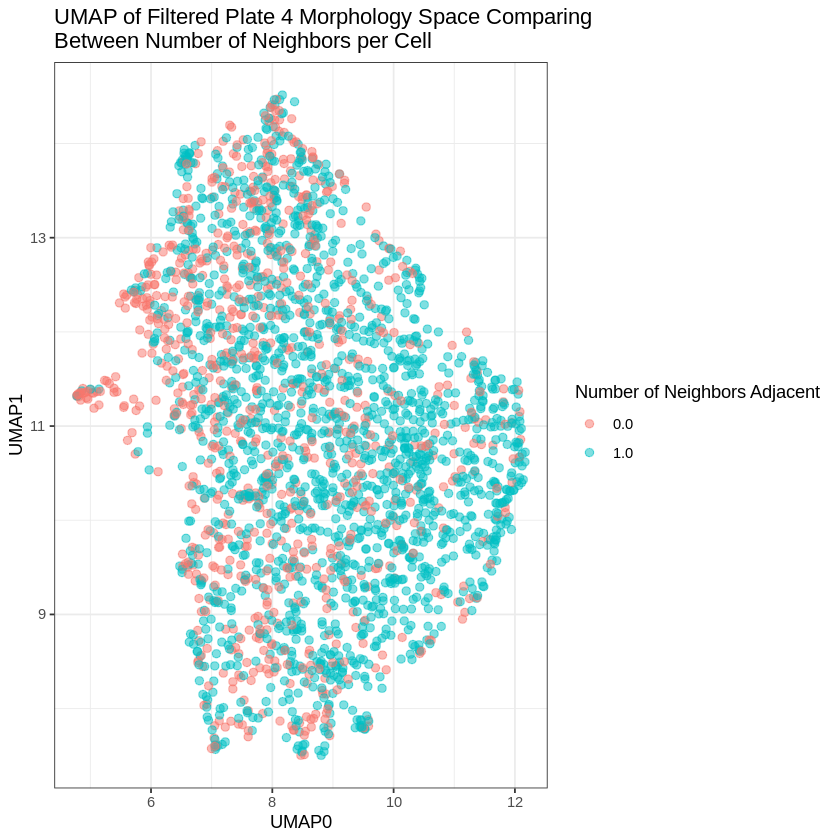

In [12]:
umap_filtered_cell_neighbors_figure <- 
  ggplot(umap_filtered_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_Neighbors_Adjacent), alpha = 0.5, size = 2) +
  theme_bw() +
  labs(title = "UMAP of Filtered Plate 4 Morphology Space Comparing\nBetween Number of Neighbors per Cell", x = "UMAP0", y = "UMAP1") +
  scale_color_discrete(name = "Number of Neighbors Adjacent")

# saving image
output_file <- file.path(paste0(output_umap_file, "_filtered_number_neighbors_cells.png"))
ggsave(output_file, umap_filtered_cell_neighbors_figure, dpi = 500, height = 8, width = 8)


print(umap_filtered_cell_neighbors_figure)